# Laptop Price Prediction

homework: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
!wget $data 

--2024-10-09 20:46:40--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2024-10-09 20:46:40 (14.5 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('laptops.csv')
len(df)

2160

In [37]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [38]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [39]:
columns = [
    'ram', 
    'storage',
    'screen',
    'final_price'
]

df = df[columns]

In [40]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


### EDA
Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

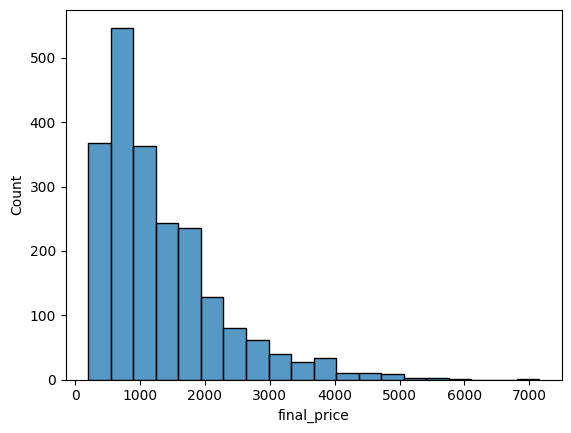

In [41]:
sns.histplot(df['final_price'], bins=20) 

<Axes: xlabel='final_price', ylabel='Count'>

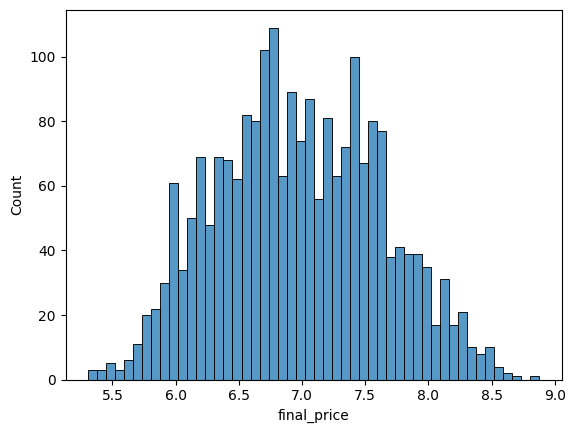

In [42]:
final_price_logs = np.log1p(df.final_price)
sns.histplot(final_price_logs, bins=50)

Question 1
There's one column with missing values. What is it?
Answer : Screen

In [43]:
df.isnull().sum() 

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'ram'? 16

In [44]:
df['ram'].median()

np.float64(16.0)

### Prepare and split 
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use the same code as in the lectures

In [45]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test    

n_train, n_val, n_test

(1296, 432, 432)

In [46]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)   #to shuffle the index

In [47]:
df_train = df.iloc[idx[:n_train]].copy().reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].copy().reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].copy().reset_index(drop=True)

df_train.head(1)

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29


In [48]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

### Question 3: train with missing values treated both as filled with zero and filled with mean 

In [49]:
#Select values for y and delete them from the dataframes

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [50]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return round(np.sqrt(mse),2)


Validate the model filled with zeros

In [51]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(597.36)

Prepare and validate model filled with mean

In [52]:
mean = df_train.ram.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(600.36)

Answer Q3: Is better to fill with **zeros**


### Question 4: train regularized linear regression

In [53]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



In [54]:
for r in [0, 0.01, 1, 10, 100]:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    #Validation part
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)


0 676.8954853003995 597.36
0.01 676.2736817205587 597.36
1 619.9030834108207 597.21
10 352.79713367679835 597.06
100 66.92071440181994 597.9


If there are multiple options, select the smallest r. 
Best RMSE result is with r = 10

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [63]:
# rmses = []

# for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
#     n = len(df)

#     n_val = int(0.2 * n)
#     n_test = int(0.2 * n)
#     n_train = n - (n_val + n_test)

#     # Select seed, generate indexes and shuffle them
#     idx = np.arange(n)
#     np.random.seed(seed)
#     np.random.shuffle(idx)   # to shuffle the index

#     df_shuffled = df.iloc[idx].copy()

#     # Split the data into training, validation and test sets with 60%, 20% and 20% of the data 
#     # respectively according to the shuffled indexes
#     # Reset the index of the dataframes
#     df_train = df_shuffled.iloc[idx[:n_train]].copy().reset_index(drop=True)
#     df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]].copy().reset_index(drop=True)
#     df_test = df_shuffled.iloc[idx[n_train+n_val:]].copy().reset_index(drop=True)

#     # Select values for y and delete them from the dataframes
#     y_train = df_train.final_price.values
#     y_val = df_val.final_price.values
#     y_test = df_test.final_price.values

#     del df_train['final_price']
#     del df_val['final_price']
#     del df_test['final_price']

#     # Training part
#     X_train = prepare_X(df_train,fillna_value=0)
#     w0, w = train_linear_regression(X_train, y_train)

#     # Validation part
#     X_val = prepare_X(df_val,fillna_value=0)
#     y_pred = w0 + X_val.dot(w)

#     score = rmse(y_val, y_pred)
#     rmses.append(score)
#     print(seed, score)

# # Calculate and print the standard deviation of the scores
# std = np.std(rmses)
# print("Standard Deviation:", round(std, 3))

rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)
    
    rmses.append(result)

print('Standard deviation: '+ str(np.std(rmses))) 


0 565.45
1 636.8
2 588.96
3 597.81
4 571.96
5 573.24
6 647.34
7 550.44
8 587.33
9 576.1
Standard deviation: 29.176152950654732


### Question 6 
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

598.60
608.60
618.60
628.60

In [66]:
# Select seed, generate indexes and shuffle them
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)   # to shuffle the index

# Split the data into training, validation and test sets with 60%, 20% and 20% of the data 
# respectively according to the shuffled indexes
# Reset the index of the dataframes
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

# Select values for y and delete them from the dataframes
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Training part
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# Validation part
X_val = prepare_X(df_val,0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

np.float64(576.1)

### Using the model on the test set

In [69]:
#Concatenate the training and validation dataframes
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)


In [70]:
X_full_train = prepare_X(df_full_train,0)
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [71]:
y_full_train = np.concatenate([y_train, y_val])    

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [72]:
#Validation part
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(608.61)

In [73]:
laptop = df_test.iloc[20].to_dict()
df_small = pd.DataFrame([laptop])
df_small

,ram,storage,screen
0,8.0,512.0,15.6


In [74]:
X_small = prepare_X(df_small,0)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

y_pred

np.float64(896.6610448350128)